# LENET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

# import os
# os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

In [2]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation


2.15.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 789 images belonging to 8 classes.


In [4]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 789 images belonging to 8 classes.


In [5]:
MODEL=Sequential()
MODEL.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(3,3), input_shape=(224,224,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(3,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Flatten())
MODEL.add(Dense(256, activation='relu'))
MODEL.add(Dense(8, activation='softmax'))

OPT    = tensorflow.keras.optimizers.Adam(0.001)

MODEL.compile(optimizer=OPT,loss='categorical_crossentropy',metrics=["accuracy", tensorflow.keras.metrics.Precision(), tensorflow.keras.metrics.Recall()])
MODEL.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 37, 37, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)              

In [6]:
model_path = "LENET.h5"

from tensorflow.keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [7]:
epochs = 100
batch_size = 32

In [8]:
WORKING = MODEL.fit_generator(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/100


24/24 [==============================] - ETA: 0s - loss: 2.0360 - accuracy: 0.2127 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1: accuracy improved from -inf to 0.21268, saving model to LENET.h5
24/24 [==============================] - 87s 4s/step - loss: 2.0360 - accuracy: 0.2127 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.9515 - val_accuracy: 0.2357 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 1.9325 - accuracy: 0.2787 - precision: 0.5556 - recall: 0.0198
Epoch 2: accuracy improved from 0.21268 to 0.27873, saving model to LENET.h5
24/24 [==============================] - 58s 2s/step - loss: 1.9325 - accuracy: 0.2787 - precision: 0.5556 - recall: 0.0198 - val_loss: 1.9485 - val_accuracy: 0.2305 - val_precision: 0.5354 - val_recall: 0.1380
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 1.8551 - accuracy: 0.2853 - precision: 0.6250 - recall: 0.0727
Epoch

24/24 [==============================] - 22s 955ms/step - loss: 1.1904 - accuracy: 0.5654 - precision: 0.7805 - recall: 0.3382 - val_loss: 1.0622 - val_accuracy: 0.6315 - val_precision: 0.8188 - val_recall: 0.4648
Epoch 20/100
24/24 [==============================] - ETA: 0s - loss: 1.1881 - accuracy: 0.5575 - precision: 0.7737 - recall: 0.3342
Epoch 20: accuracy did not improve from 0.56539
24/24 [==============================] - 23s 948ms/step - loss: 1.1881 - accuracy: 0.5575 - precision: 0.7737 - recall: 0.3342 - val_loss: 1.0443 - val_accuracy: 0.6224 - val_precision: 0.8045 - val_recall: 0.4232
Epoch 21/100
24/24 [==============================] - ETA: 0s - loss: 1.1466 - accuracy: 0.5627 - precision: 0.7744 - recall: 0.3989
Epoch 21: accuracy did not improve from 0.56539
24/24 [==============================] - 23s 956ms/step - loss: 1.1466 - accuracy: 0.5627 - precision: 0.7744 - recall: 0.3989 - val_loss: 1.0380 - val_accuracy: 0.6211 - val_precision: 0.8269 - val_recall: 0.4

Epoch 40/100
24/24 [==============================] - ETA: 0s - loss: 0.5597 - accuracy: 0.8058 - precision: 0.9113 - recall: 0.7054
Epoch 40: accuracy improved from 0.78996 to 0.80581, saving model to LENET.h5
24/24 [==============================] - 24s 1s/step - loss: 0.5597 - accuracy: 0.8058 - precision: 0.9113 - recall: 0.7054 - val_loss: 0.4707 - val_accuracy: 0.8359 - val_precision: 0.9079 - val_recall: 0.7826
Epoch 41/100
24/24 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.8018 - precision: 0.9008 - recall: 0.7318
Epoch 41: accuracy did not improve from 0.80581
24/24 [==============================] - 23s 945ms/step - loss: 0.5568 - accuracy: 0.8018 - precision: 0.9008 - recall: 0.7318 - val_loss: 0.4510 - val_accuracy: 0.8581 - val_precision: 0.9164 - val_recall: 0.7995
Epoch 42/100
24/24 [==============================] - ETA: 0s - loss: 0.5549 - accuracy: 0.7952 - precision: 0.8923 - recall: 0.7226
Epoch 42: accuracy did not improve from 0.80581
24

24/24 [==============================] - ETA: 0s - loss: 0.2901 - accuracy: 0.9128 - precision: 0.9465 - recall: 0.8653
Epoch 60: accuracy improved from 0.90225 to 0.91281, saving model to LENET.h5
24/24 [==============================] - 23s 962ms/step - loss: 0.2901 - accuracy: 0.9128 - precision: 0.9465 - recall: 0.8653 - val_loss: 0.2562 - val_accuracy: 0.9141 - val_precision: 0.9460 - val_recall: 0.8893
Epoch 61/100
24/24 [==============================] - ETA: 0s - loss: 0.2773 - accuracy: 0.9194 - precision: 0.9531 - recall: 0.8851
Epoch 61: accuracy improved from 0.91281 to 0.91942, saving model to LENET.h5
24/24 [==============================] - 23s 984ms/step - loss: 0.2773 - accuracy: 0.9194 - precision: 0.9531 - recall: 0.8851 - val_loss: 0.2342 - val_accuracy: 0.9206 - val_precision: 0.9540 - val_recall: 0.8906
Epoch 62/100
24/24 [==============================] - ETA: 0s - loss: 0.2875 - accuracy: 0.9009 - precision: 0.9375 - recall: 0.8719
Epoch 62: accuracy did not imp

24/24 [==============================] - 22s 914ms/step - loss: 0.1716 - accuracy: 0.9538 - precision: 0.9643 - recall: 0.9287 - val_loss: 0.1750 - val_accuracy: 0.9453 - val_precision: 0.9620 - val_recall: 0.9232
Epoch 81/100
24/24 [==============================] - ETA: 0s - loss: 0.1761 - accuracy: 0.9419 - precision: 0.9629 - recall: 0.9260
Epoch 81: accuracy did not improve from 0.95376
24/24 [==============================] - 22s 948ms/step - loss: 0.1761 - accuracy: 0.9419 - precision: 0.9629 - recall: 0.9260 - val_loss: 0.1229 - val_accuracy: 0.9635 - val_precision: 0.9745 - val_recall: 0.9466
Epoch 82/100
24/24 [==============================] - ETA: 0s - loss: 0.1675 - accuracy: 0.9524 - precision: 0.9645 - recall: 0.9326
Epoch 82: accuracy did not improve from 0.95376
24/24 [==============================] - 23s 978ms/step - loss: 0.1675 - accuracy: 0.9524 - precision: 0.9645 - recall: 0.9326 - val_loss: 0.1460 - val_accuracy: 0.9505 - val_precision: 0.9666 - val_recall: 0.9

In [9]:
WORKING.history.keys()


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

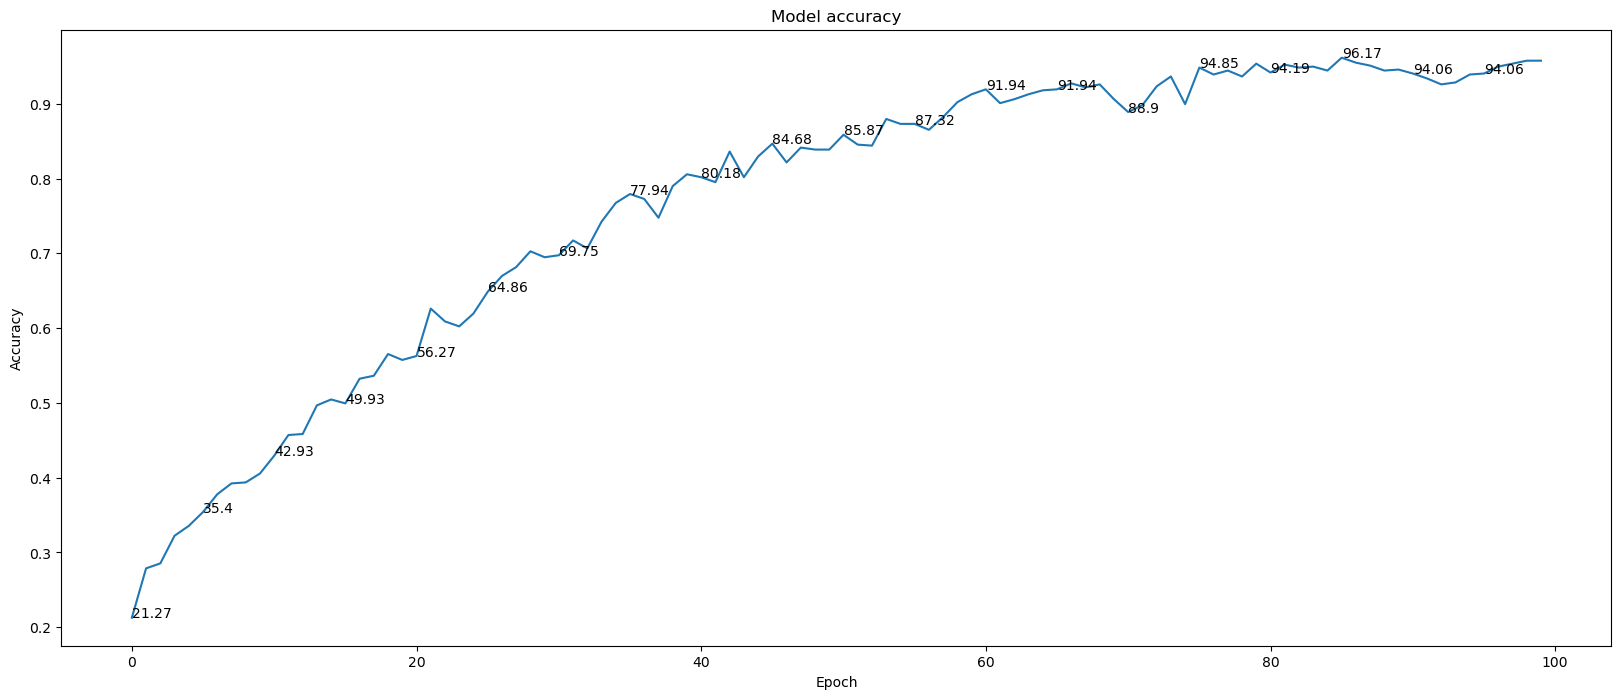

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['accuracy'][i]*100,2),xy=(i,WORKING.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

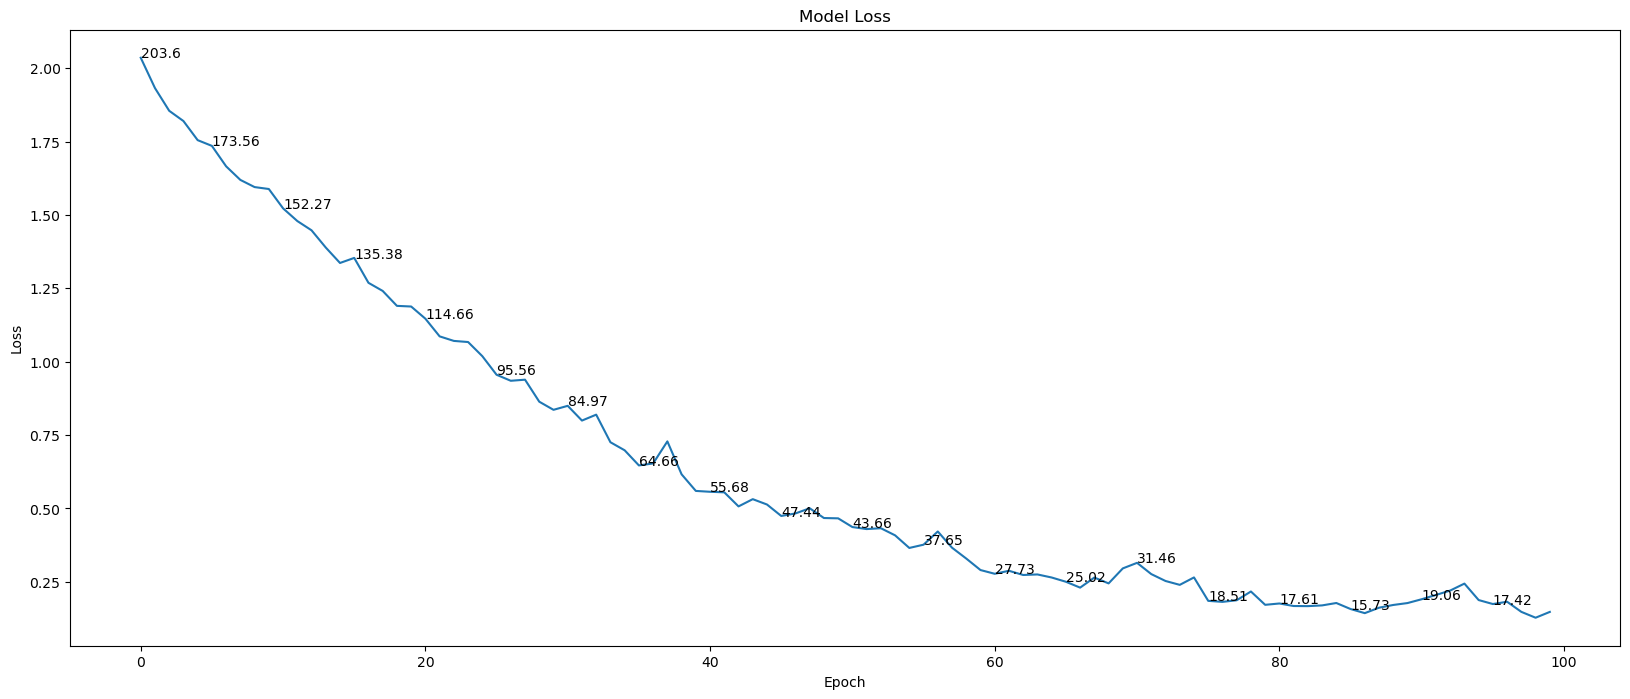

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['loss'][i]*100,2),xy=(i,WORKING.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()